In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Looking at an overview of the data

In [5]:
df = pd.read_csv('GBvideos.csv')
print(df.shape)
print(df.nunique())
print(df.info())

(38916, 16)
video_id                   3272
trending_date               205
title                      3369
channel_title              1625
category_id                  16
publish_time               3250
tags                       3122
views                     38393
likes                     30556
dislikes                  11092
comment_count             15778
thumbnail_link             3272
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                3704
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-nul

In [6]:
print(df.category_id)

0        26
1        24
2        10
3        17
4        25
         ..
38911    10
38912    10
38913    10
38914    24
38915    10
Name: category_id, Length: 38916, dtype: int64


# Changing category id's to their names

In [8]:
cat_dict = {1: 'Film & Animation',
            26: 'How To',
            2: 'Autos & Vehicles',
            24: "Entertainment",
            10: 'Music',
            17: 'Sports',
            25: 'News/Politics',
            22: 'People & Blogs',
            23: 'Comedy',
            28: 'Science and Tech',
            15: 'Pets and Animals',
            27: 'Education',
            20: 'Gaming',
            19: 'Travel & Events',
            29: 'Nonprofits/Activism',
            43: 'Shows'}


df = df.replace({"category_id": cat_dict})
df['log_likes'] = np.log(df['likes'] + 1)
df['log_views'] = np.log(df['views'] + 1)
df['log_dislikes'] = np.log(df['dislikes'] + 1)
df['log_comment'] = np.log(df['comment_count'] + 1)
pallete = sns.light_palette("#ff0000")

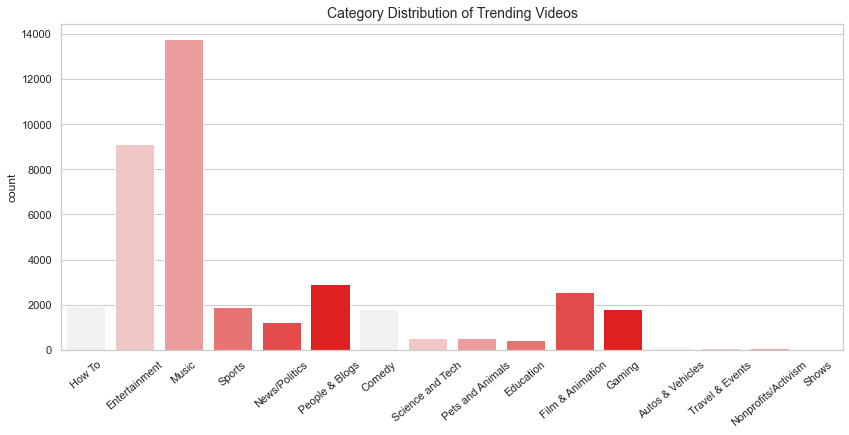

In [9]:
plt.figure(figsize=(14,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='category_id', data=df, palette=pallete)
ax.set_title("Category Distribution of Trending Videos", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.show()

# Comparing various ratios together such as likes to views, likes to dislikes, etc.

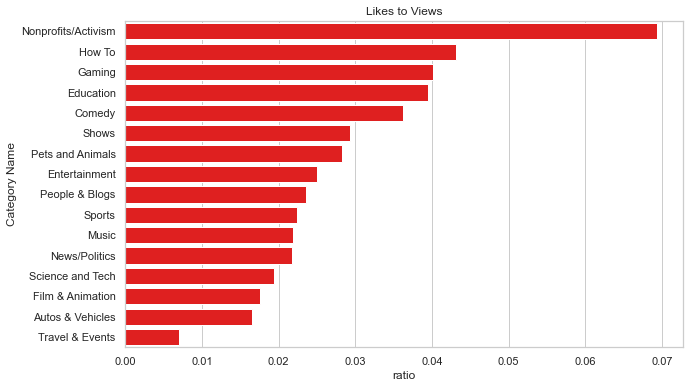

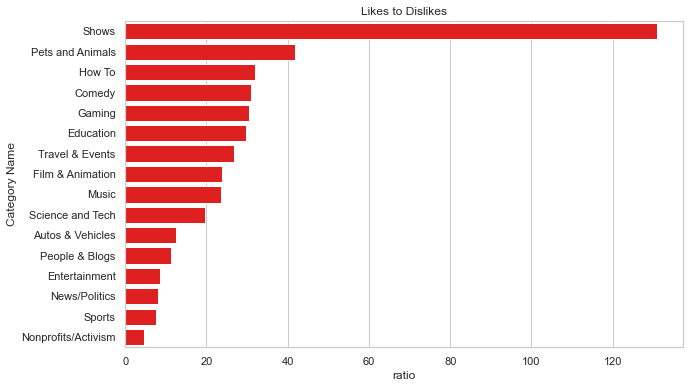

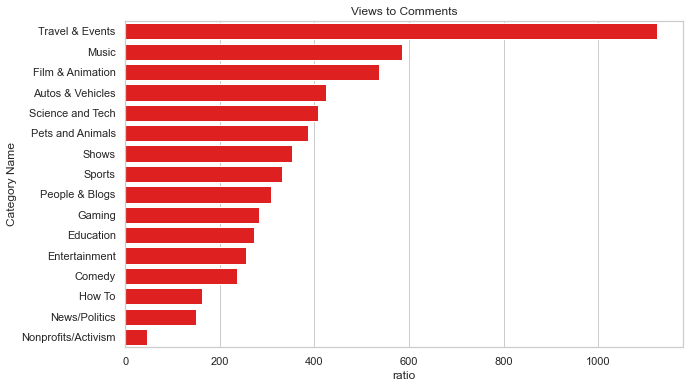

In [10]:
def ratio_Comparison(numerator, denominator, title):
    ratio = df.groupby('category_id')[numerator].agg('sum') / df.groupby('category_id')[denominator].agg('sum')
    ratio = ratio.sort_values(ascending=False).reset_index()
    ratio.columns = ['category_id', 'ratio']
    plt.subplots(figsize=(10,6))
    ax = sns.barplot(x="ratio", y="category_id", data = ratio,
                         label = 'Ratio Title', color="red")
    ax.set_title(title)
    ax.set_ylabel('Category Name')
    plt.show()
    
ratio_Comparison('likes', 'views', 'Likes to Views')
ratio_Comparison('likes', 'dislikes', 'Likes to Dislikes')
ratio_Comparison('views', 'comment_count', 'Views to Comments')

# Looking at the most frequent tags

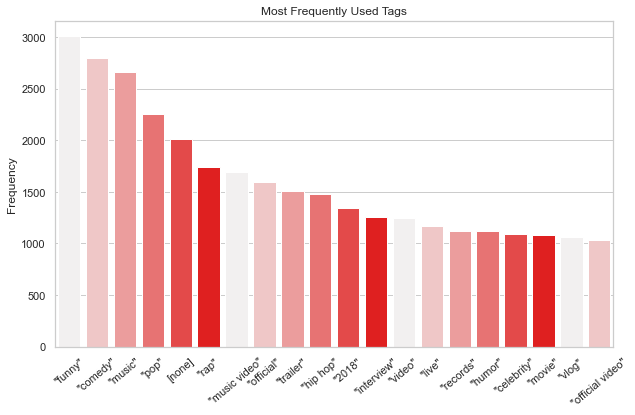

In [11]:
tags = df['tags'].map(lambda x: x.lower().split('|')).values
all_tags = [tag for t in tags for tag in t]
tags_df = pd.DataFrame({'tags': all_tags})
x = tags_df['tags'].value_counts().index[0:20]
y = tags_df['tags'].value_counts().values[0:20]
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
title = "Most Frequently Used Tags"
ax = sns.barplot(x=x, y=y, palette=pallete)
ax.set_title(title)
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.show()

# Analyzing distributions of engagement across categories

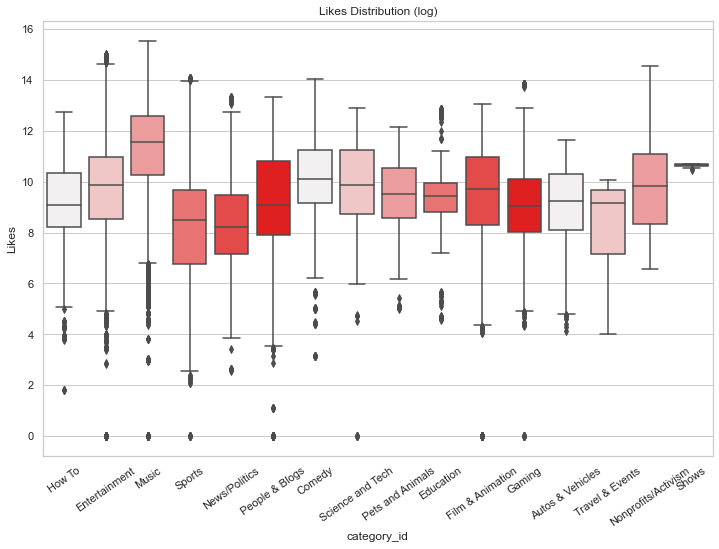

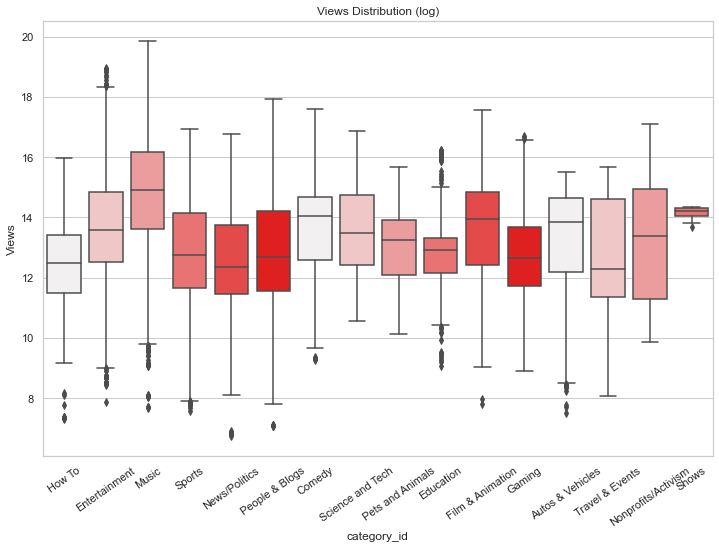

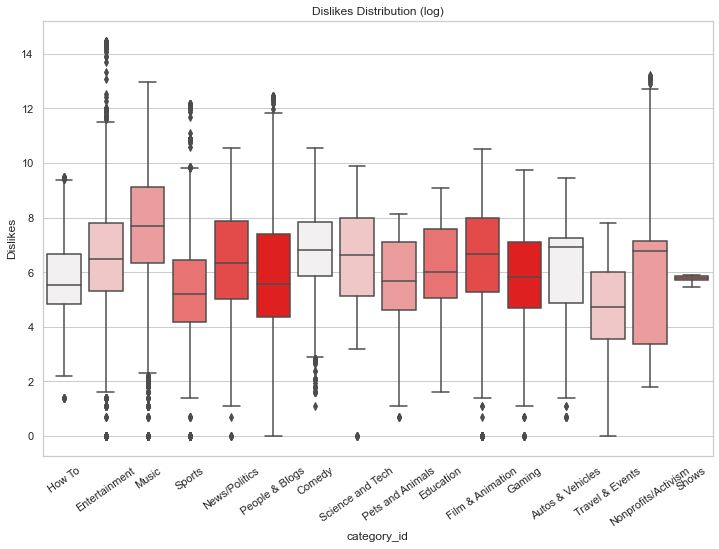

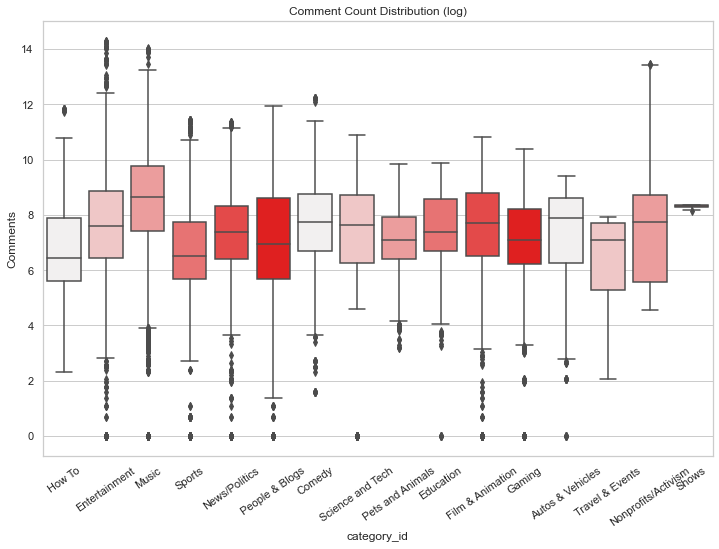

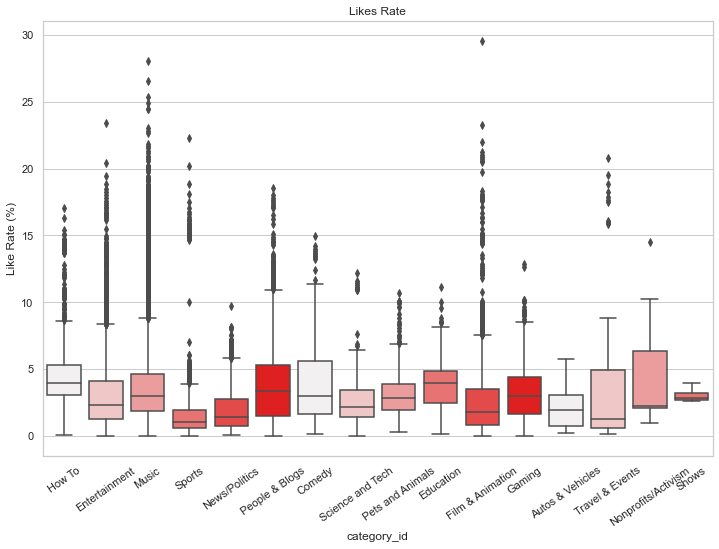

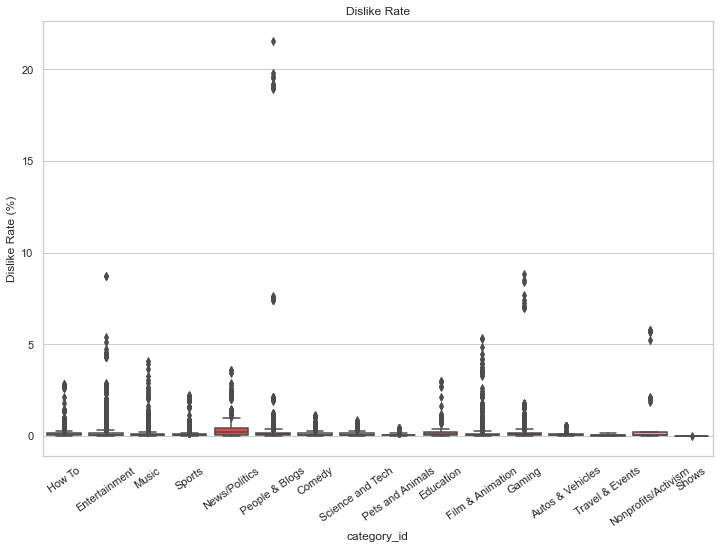

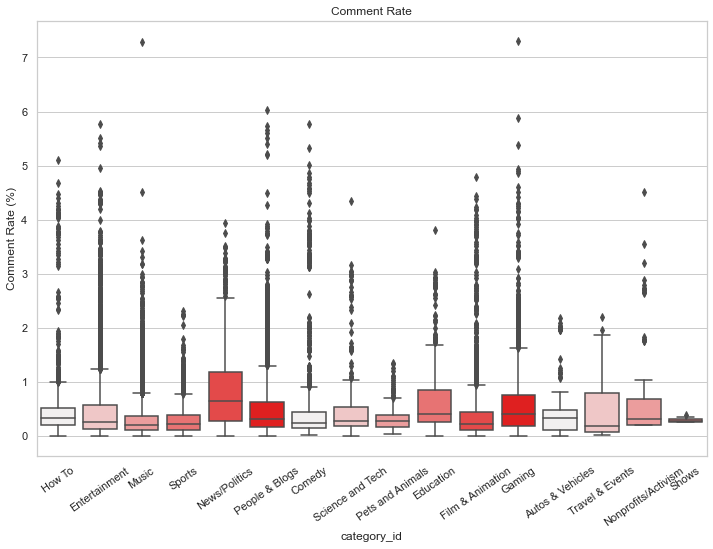

In [15]:
def Distributions(attribute, title, y_label):
    plt.figure(figsize=(12,8))
    box = sns.boxplot(x='category_id', y=attribute, palette=pallete, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=35)
    box.set_title(title)
    box.set_ylabel(y_label)
    plt.show()
    
Distributions('log_likes', 'Likes Distribution (log)', 'Likes')
Distributions('log_views', 'Views Distribution (log)', 'Views')
Distributions('log_dislikes', 'Dislikes Distribution (log)', 'Dislikes')
Distributions('log_comment', 'Comment Count Distribution (log)', 'Comments')

df['like_rate'] = df['likes'] / df['views'] * 100
df['dislike_rate'] = df['dislikes'] / df['views'] * 100
df['comment_rate'] = df['comment_count'] / df['views'] * 100

Distributions('like_rate', 'Likes Rate', 'Like Rate (%)')
Distributions('dislike_rate', 'Dislike Rate', 'Dislike Rate (%)')
Distributions('comment_rate', 'Comment Rate', 'Comment Rate (%)')

# Looking at how engagement changes over time

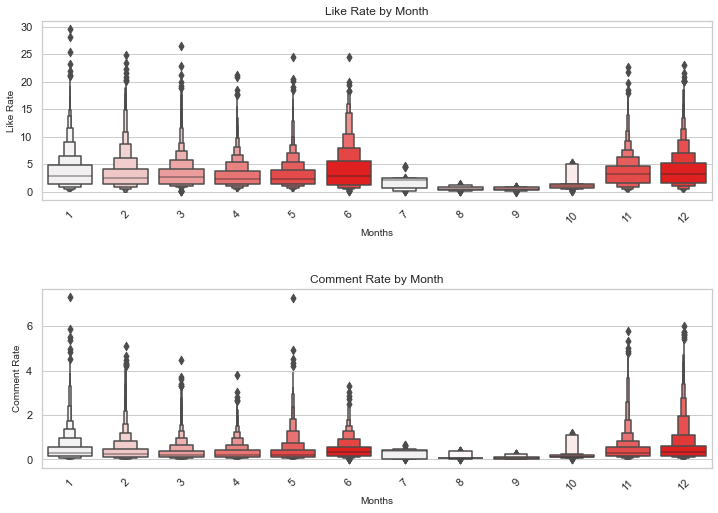

In [22]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['month'] = df['publish_time'].dt.month

plt.figure(figsize=(12,8))
plt.subplot(211)
g = sns.boxenplot(x='month', y='like_rate', data=df, palette=pallete)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("Like Rate by Month", fontsize=12)
g.set_xlabel("Months", fontsize=10)
g.set_ylabel("Like Rate", fontsize=10)
plt.subplots_adjust(hspace = 0.5, top = 0.9)


plt.subplot(212)
g1 = sns.boxenplot(x='month', y='comment_rate', data=df, palette=pallete)
g1.set_xticklabels(g.get_xticklabels(), rotation=45)
g1.set_title("Comment Rate by Month", fontsize=12)
g1.set_xlabel("Months", fontsize=10)
g1.set_ylabel("Comment Rate", fontsize=10)
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.show()

# Finally, let's look at a wordcloud of tags

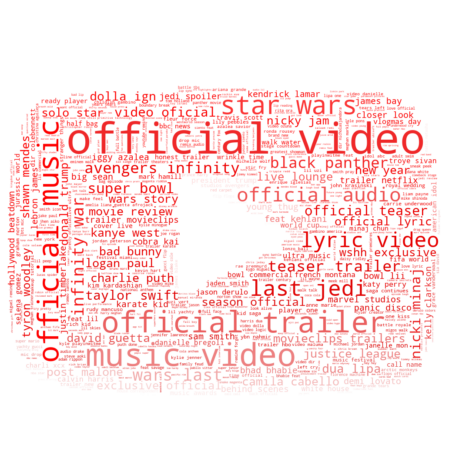

In [24]:
from PIL import Image
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator

image = 'flat,1000x1000,075,f.u1.jpg'
a = df['title'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(stopwords.words('english'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

plt.figure(figsize=(12,8))
mask = np.array(Image.open(image))
image_colors = ImageColorGenerator(mask)
cloud = WordCloud(background_color="white", max_words=500, mask=mask, color_func=image_colors).generate(" ".join(cleaned_data_title))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()